In [4]:
import pandas as pd
# Load datasets
macro_data = pd.read_csv("../data/processed_data/macro_economic.csv")
events_Holidays_data = pd.read_csv("../data/processed_data/events_Holidays_data.csv")
weather_data = pd.read_csv("../data/processed_data/weather_data.csv")
train_data = pd.read_csv("../data/processed_data/train.csv")
test_data = pd.read_csv("../data/processed_data/Submission.csv")
kaggle_submission_form = pd.read_csv("../data/processed_data/Kaggle_Submission_Format.csv")

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       180 non-null    int64  
 1   Month                      180 non-null    int64  
 2   ProductCategory            180 non-null    object 
 3   Sales(In ThousandDollars)  170 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


In [6]:
train_data.isna().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    10
dtype: int64

In [7]:
train_data['Sales(In ThousandDollars)'].fillna((train_data['Sales(In ThousandDollars)'].mean()),
                                               inplace=True)

/tmp/ipykernel_137204/2795247986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Sales(In ThousandDollars)'].fillna((train_data['Sales(In ThousandDollars)'].mean()),


In [8]:
train_data

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0
...,...,...,...,...
175,2013,11,MenClothing,798.0
176,2013,11,OtherClothing,1209.0
177,2013,12,WomenClothing,4865.0
178,2013,12,MenClothing,1085.0


Train Data Overview:
   Year  Month ProductCategory  Sales(In ThousandDollars)
0  2009      1   WomenClothing                     1755.0
1  2009      1     MenClothing                      524.0
2  2009      1   OtherClothing                      936.0
3  2009      2   WomenClothing                     1729.0
4  2009      2     MenClothing                      496.0


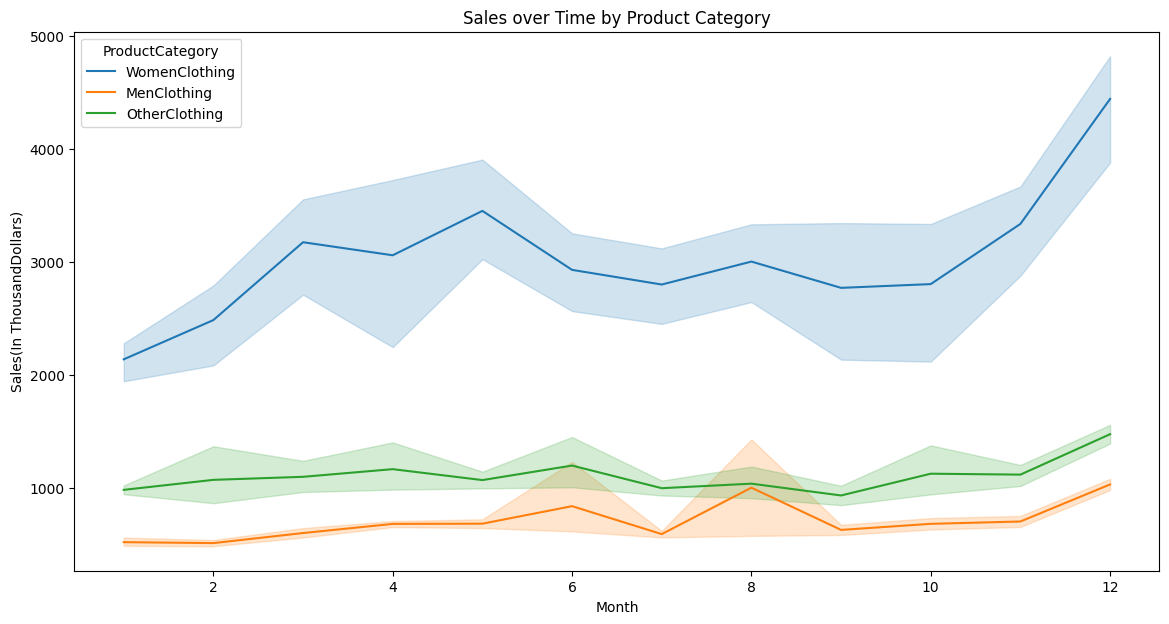

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling
# import tensorflow as tf
# Exploratory Data Analysis (EDA)
print("Train Data Overview:")
print(train_data.head())
# Visualize sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=train_data, x='Month', y='Sales(In ThousandDollars)', hue='ProductCategory')
plt.title('Sales over Time by Product Category')
plt.show()

In [13]:
test_data.isna().sum()

Year                          0
Month                         0
ProductCategory               0
Unnamed: 3                   36
Sales(In ThousandDollars)    36
dtype: int64

In [14]:
women_clothing_data = train_data[train_data['ProductCategory'] == 'WomenClothing']
women_clothing_data.drop(columns=['ProductCategory'], inplace=True)
women_clothing_data.fillna(method='bfill',inplace=True)
men_clothing_data = train_data[train_data['ProductCategory'] == 'MenClothing']
men_clothing_data.drop(columns=['ProductCategory'], inplace=True)
men_clothing_data.fillna(method='bfill',inplace=True)
other_clothing_data = train_data[train_data['ProductCategory'] == 'OtherClothing']
other_clothing_data.drop(columns=['ProductCategory'], inplace=True)
other_clothing_data.fillna(method='bfill',inplace=True)


idx_women = women_clothing_data.index[women_clothing_data['Sales(In ThousandDollars)'] ==0]
idx_men = men_clothing_data.index[men_clothing_data['Sales(In ThousandDollars)'] ==0]
idx_other = other_clothing_data.index[other_clothing_data['Sales(In ThousandDollars)'] ==0]

/tmp/ipykernel_137204/2435477420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_clothing_data.drop(columns=['ProductCategory'], inplace=True)
/tmp/ipykernel_137204/2435477420.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  women_clothing_data.fillna(method='bfill',inplace=True)
/tmp/ipykernel_137204/2435477420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_clothing_data.fillna(method='bfill',inplace=True)
/tmp/ipykernel_137204/2435477420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [15]:
test_data = test_data.iloc[:,0:3]
test_data

,Year,Month,ProductCategory
0,2014,1,WomenClothing
1,2014,1,MenClothing
2,2014,1,OtherClothing
3,2014,2,WomenClothing
4,2014,2,MenClothing
5,2014,2,OtherClothing
6,2014,3,WomenClothing
7,2014,3,MenClothing
8,2014,3,OtherClothing
9,2014,4,WomenClothing


In [16]:
events_Holidays_data.isnull().sum()

Year           0
MonthDate      0
Event          0
DayCategory    0
dtype: int64

In [17]:
weather_data.head

<bound method NDFrame.head of      Year Month  Day  Temp high (°C)  Temp avg (°C)  Temp low (°C)  \
0    2009   Jan    1              -3             -6             -9   
1    2009   Jan    2               1             -2             -5   
2    2009   Jan    3               3              1             -2   
3    2009   Jan    4               6              1             -4   
4    2009   Jan    5               6              5              3   
..    ...   ...  ...             ...            ...            ...   
360  2009   Dec   27              13              9              4   
361  2009   Dec   28               6              3             -1   
362  2009   Dec   29              -1             -4             -9   
363  2009   Dec   30               0             -3             -7   
364  2009   Dec   31               2              0             -2   

     Dew Point high (°C)  Dew Point avg (°C)  Dew Point low (°C)  \
0                    -16                 -17                 

In [18]:
kaggle_submission_form

,Year,Sales(In ThousandDollars)
0,1,1000
1,2,1000
2,3,1000
3,4,1000
4,5,1000
5,6,1000
6,7,1000
7,8,1000
8,9,1000
9,10,1000


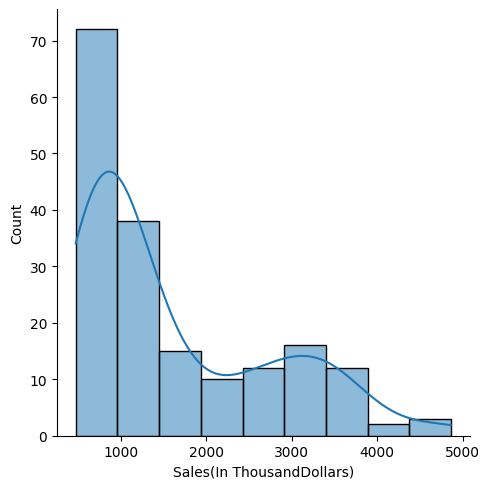

In [19]:
sns.displot(train_data['Sales(In ThousandDollars)'], kde =True)

<Axes: xlabel='Year', ylabel='Sales(In ThousandDollars)'>

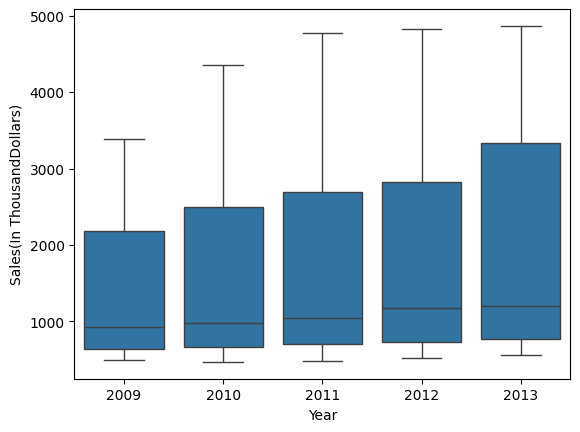

In [20]:
sns.boxplot(data=train_data, x="Year", y='Sales(In ThousandDollars)')

<Axes: xlabel='ProductCategory', ylabel='Sales(In ThousandDollars)'>

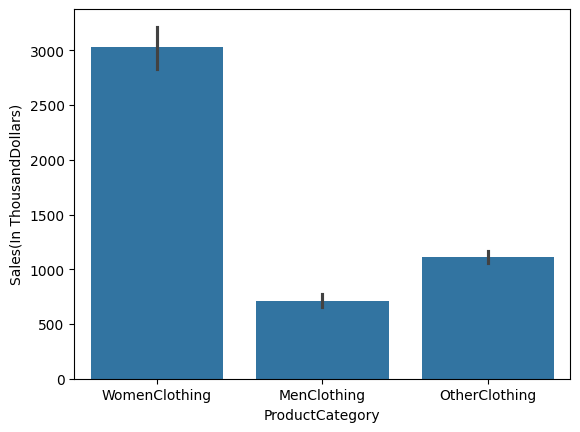

In [21]:
sns.barplot(data=train_data, x="ProductCategory", y='Sales(In ThousandDollars)')

In [22]:
cat = {'WomenClothing': 1, 'MenClothing':2, 'OtherClothing':3}
       
train_data.replace({"ProductCategory": cat}, inplace=True)
test_data.replace({"ProductCategory": cat}, inplace=True)

train_data

/tmp/ipykernel_137204/3555658415.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"ProductCategory": cat}, inplace=True)
/tmp/ipykernel_137204/3555658415.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({"ProductCategory": cat}, inplace=True)


,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,1,1755.0
1,2009,1,2,524.0
2,2009,1,3,936.0
3,2009,2,1,1729.0
4,2009,2,2,496.0
...,...,...,...,...
175,2013,11,2,798.0
176,2013,11,3,1209.0
177,2013,12,1,4865.0
178,2013,12,2,1085.0


In [23]:
test_data

,Year,Month,ProductCategory
0,2014,1,1
1,2014,1,2
2,2014,1,3
3,2014,2,1
4,2014,2,2
5,2014,2,3
6,2014,3,1
7,2014,3,2
8,2014,3,3
9,2014,4,1


In [24]:
events_Holidays_data['MonthDate'] = events_Holidays_data['MonthDate'].astype(str)
events_Holidays_data['Month'] = events_Holidays_data['MonthDate'].apply(lambda x: x.split('-')[1])
events_Holidays_data['Month'] = events_Holidays_data['Month'].astype(int)
events_Holidays_data.drop(events_Holidays_data.index[events_Holidays_data['Event'] == "'New Year's Day' observed"], inplace=True)

events_Holidays_data.drop(columns=['MonthDate', 'Event'], inplace=True)

events_Holidays_data['date'] = pd.to_datetime(events_Holidays_data[['Year', 'Month']].assign(day=1))
events_Holidays_data['date'] = events_Holidays_data.date.dt.to_period('M')
events_Holidays_data.drop(columns=['Year', 'Month'], inplace=True)
events_Holidays_data.set_index('date', inplace=True)

In [25]:
events_holidays_dummies = pd.get_dummies(data=events_Holidays_data, columns=['DayCategory'])
events_holidays_count = events_holidays_dummies.groupby('date').sum()
events_holidays_count.rename(columns={'DayCategory_Event': 'Events', 'DayCategory_Federal Holiday': 'Holidays'}, inplace=True)

In [26]:
for key in weather_data.keys():
    print(f"Data for year {key}:")
    print(weather_data[key].dtypes)
    print("\n")

Data for year Year:
int64


Data for year Month:
object


Data for year Day:
int64


Data for year Temp high (°C):
int64


Data for year Temp avg (°C):
int64


Data for year Temp low (°C):
int64


Data for year Dew Point high (°C):
int64


Data for year Dew Point avg (°C):
int64


Data for year Dew Point low (°C):
int64


Data for year Humidity (%) high:
int64


Data for year Humidity (%) avg:
int64


Data for year Humidity (%) low:
int64


Data for year Sea Level Press. (hPa) high:
int64


Data for year Sea Level Press. (hPa) avg:
int64


Data for year Sea Level Press. (hPa) low:
int64


Data for year Visibility (km) high:
int64


Data for year Visibility (km) avg:
int64


Data for year Visibility (km) low:
int64


Data for year Wind (km/h) low:
object


Data for year Wind (km/h) avg:
object


Data for year Wind (km/h) high:
object


Data for year Precip. (mm) sum:
object


Data for year WeatherEvent:
object




In [27]:
weather_data = pd.read_excel('../data/raw_data/WeatherData.xlsx', sheet_name=None)

for key in weather_data.keys():
    weather_data[key]['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
    weather_data[key]['Year'] = key
    weather_data[key]['date'] = pd.to_datetime(weather_data[key][['Year', 'Month', 'Day']], format='%y%m%d')
    weather_data[key]['date'] = weather_data[key].date.dt.to_period('M')
    weather_data[key]['WeatherEvent'].replace(to_replace=r'^[A-Za-z]', value=1, regex=True, inplace=True)
    weather_data[key]['WeatherEvent'].fillna(0, inplace=True)
    weather_data[key]['WeatherEvent'].astype('int64')
    weather_data[key].fillna(0, inplace=True)
    weather_data[key] = weather_data[key][['date', 'Temp avg (°C)', 'Dew Point avg (°C)', 'Humidity\xa0(%) avg', 'Sea Level Press.\xa0(hPa) high', 'Visibility\xa0(km) high', \
                                       'WeatherEvent','Wind\xa0(km/h) avg']]
    weather_data[key]['Temp avg (°C)'] = weather_data[key]['Temp avg (°C)'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Dew Point avg (°C)'] = weather_data[key]['Dew Point avg (°C)'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Humidity\xa0(%) avg'] = weather_data[key]['Humidity\xa0(%) avg'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Sea Level Press.\xa0(hPa) high'] = weather_data[key]['Sea Level Press.\xa0(hPa) high'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Visibility\xa0(km) high'] = weather_data[key]['Visibility\xa0(km) high'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Wind\xa0(km/h) avg'] = weather_data[key]['Wind\xa0(km/h) avg'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key].set_index('date', inplace=True)
    weather_event = weather_data[key].groupby(['date'])['WeatherEvent'].sum()

    weather_data[key] = weather_data[key].drop(columns=['WeatherEvent']).groupby('date').median()

    weather_data[key]['WeatherEvent'] = weather_event

/tmp/ipykernel_137204/3980159676.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_data[key]['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
/tmp/ipykernel_137204/3980159676.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option(

In [28]:
weather_concat = pd.concat([weather_data[key] for key in weather_data.keys()])

In [29]:
macro_economic_data = pd.read_excel('../data/raw_data/macro_economic.xlsx')
macro_economic_data['Year'] = macro_economic_data['Year-Month'].apply(lambda x: int(x.split('-')[0]))
macro_economic_data['Month'] = macro_economic_data['Year-Month'].apply(lambda x: x.split('-')[1])
macro_economic_data['Month'] = macro_economic_data['Month'].apply(lambda x: x.strip())
macro_economic_data['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
macro_economic_data['date'] = pd.to_datetime(macro_economic_data[['Year', 'Month']].assign(day=1))
macro_economic_data['date'] = macro_economic_data.date.dt.to_period('M')
macro_economic_data.drop(columns=['Year-Month', 'PartyInPower', 'Year', 'Month', 'AdvertisingExpenses (in Thousand Dollars)'], inplace=True)

macro_economic_data.set_index('date', inplace=True)

/tmp/ipykernel_137204/2941376312.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  macro_economic_data['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
/tmp/ipykernel_137204/2941376312.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_optio

In [30]:
macro_economic_data

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
date,,,,,,,,,,,,,,,
2009-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
2009-02,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
2009-03,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
2009-04,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225
2009-05,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.520,12.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08,18741.599947,16797.206610,264.160,4.9,12.51,9.64,25.52,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950
2016-09,18840.309646,16852.562745,264.602,4.9,12.51,9.64,25.74,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950
2016-10,18740.780023,16725.460098,264.738,4.8,12.51,9.64,26.04,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425


In [31]:
combined = macro_economic_data.merge(weather_concat, on='date')
combined = combined.merge(events_holidays_count, on='date', how='left')
combined.fillna(0, inplace=True)

In [32]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

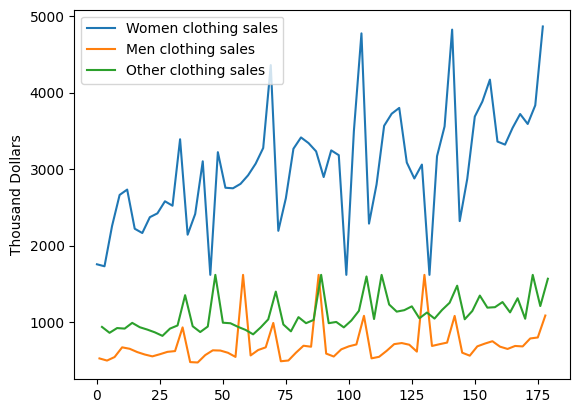

In [33]:
ax = women_clothing_data.drop(idx_women).plot(y='Sales(In ThousandDollars)', label='Women clothing sales', ylabel='Thousand Dollars')
men_clothing_data.drop(idx_men).plot(y='Sales(In ThousandDollars)', ax=ax, label='Men clothing sales')
other_clothing_data.drop(idx_other).plot(y='Sales(In ThousandDollars)', ax=ax, label='Other clothing sales')
plt.show()

In [34]:
women_clothing_train = women_clothing_data.loc['2009-01-01':'2012-12-01']
women_clothing_val = women_clothing_data.loc['2013-01-01':'2013-12-01']

In [36]:
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
dp = DeterministicProcess(
    index=women_clothing_data.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()
# out_sample features used for forecasting
X_fore = dp.out_of_sample(steps=12)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [37]:
X.drop(idx_women, inplace=True)


In [39]:
from sklearn.linear_model import LinearRegression
y = women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required by LinearRegression.

In [196]:
train_data.columns

Index(['Year', 'Month', 'ProductCategory', 'Sales(In ThousandDollars)'], dtype='object')

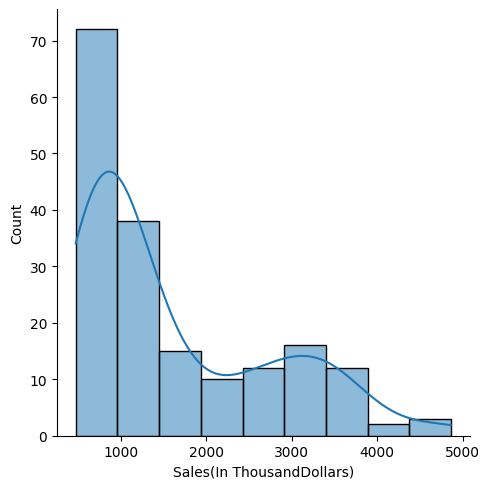

In [197]:
target = train_data.pop('Sales(In ThousandDollars)')
sns.displot(target, kde=True)

In [114]:
train_data['Growth'] = growth
train_data

,Year,Month,ProductCategory,Growth
0,2009,1,1,0.000000
1,2009,1,2,0.000000
2,2009,1,3,0.000000
3,2009,2,1,-0.014815
4,2009,2,2,-0.053435
...,...,...,...,...
175,2013,11,2,0.016561
176,2013,11,3,-0.252194
177,2013,12,1,0.268910
178,2013,12,2,0.359649
